## 분류 평가

- 정확도(Accuracy): 가장 직관적으로 이해할 수 있는 지표로, 전체 예측 데이터 중 예측이 정확한 데이터의 비율을 의미합니다. 하지만 이는 불균형한 레이블 클래스를 가진 경우, 즉 특정 클래스의 데이터가 많을 때 모델의 성능을 왜곡할 수 있습니다.

- 오차 행렬(Confusion Matrix): 이진 분류에서 성능을 나타내는 행렬로, FP, FN, TP, TN의 4분면으로 이루어져 있습니다. 각각은 다음과 같습니다.

    - True Positive(TP): 실제 값과 예측 값이 모두 Positive(1)인 경우
    - False Positive(FP): 실제 값은 Negative(0)인데 Positive(1)로 잘못 예측한 경우
    - False Negative(FN): 실제 값은 Positive(1)인데 Negative(0)로 잘못 예측한 경우
    - True Negative(TN): 실제 값과 예측 값이 모두 Negative(0)인 경우
- 정밀도(Precision)와 재현율(Recall):

    - 정밀도: TP / (FP + TP). Positive로 예측한 대상 중에 실제 값이 Positive인 데이터의 비율을 의미합니다.
    - 재현율: TP / (FN + TP). 실제 값이 Positive인 대상 중에 예측과 실제 값이 모두 Positive인 데이터 비율을 의미합니다.
    - F1 스코어: 정밀도와 재현율을 결합한 지표로, 이 두 값이 어느 한 쪽으로 치우치지 않을 때 높은 값을 가집니다.

    - ROC-AUC: Receiver Operation Characteristic Curve와 이 곡선의 면적인 Area Under Curve를 의미합니다. 이진 분류의 예측 성능 측정에서 중요하게 사용되며, 1에 가까울수록 좋은 수치를 나타냅니다.

- 위의 지표들은 sklearn.metrics 모듈에서 제공하는 다양한 API를 통해 쉽게 계산할 수 있습니다. 이 지표들을 통해 모델의 성능을 평가하고, 모델 간 성능을 비교하거나, 하이퍼파라미터 튜닝 등을 통해 모델을 개선할 수 있습니다.

* TP, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
* 앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정/긍정을 의미
* TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했고 실제값은 Negative 값 0
* FN은 예측값을 Negative 값 0으로 예측했고 실제값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
* 정확도 = (TP + TN) / ( TP + TN + FP + FN)
* 정밀도 = TP / ( TP + FP)
* 재현율 = TP / ( TP + FN) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐.
* F1 = 2 * ( 정밀도 * 재현율) / (정밀도 + 재현율)
* 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단)
* 정밀도가 더 중요한 지표인 사례는 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생


#### 정밀도/제현율 트레이드오프
* 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
* 정밀도와 재현율은 한쪽을 높이면 다른 하나의 수치는 낮아지므로 트레이드오프(Trade-off) 관계임

#### 예측 확률을 반환하는 predict_proba()
* 사이킷런 분류 알고리즘은 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구함
* 그리고 예측 확률이 큰 레이블 값으로 예측
* 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측되었다면 최종 예측은 더 큰 확률을 가진 1로 예측
* 이진 분류에서는 이 임곗값을 0.5로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정함
* 사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_prob()를 제공 - 학습이 완료된 사이킷런 Classifier 객체에서 호출
* predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과임

In [6]:
# 일괄 전처리 사용자 함수(null 처리, 불필요 칼럼 삭제, 레이블 인코딩) 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행.
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할 후 학습 및 예측
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('./dataset/train.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
titanic_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
A24            1
E40            1
D9             1
C111           1
B102           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할 후 학습 및 예측
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('./dataset/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr
# len(X_test)

0.8491620111731844

과제1_0517. 전처리 사용자 함수 transform_features(df)을 수정 보완하여 적용하고 알고리즘을 dt를 사용하여 모델링 및 성능평가를 수행하세요.

In [9]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(type(pred_proba[:3]))
type(pred.reshape(-1,1))
pred.reshape(-1,1)[:3]
pred_proba[:3]
# pred_proba_resutl = np.concatenate([pred_proba,pred.reshape(-1,1)])

<class 'numpy.ndarray'>


array([[0.4616653 , 0.5383347 ],
       [0.87862763, 0.12137237],
       [0.87727002, 0.12272998]])

In [10]:
# 타이타닉 생존 데이터를 학습한 LogisticRegression 객체에서 predict_proba() 메서드 수행
# 수행한 뒤 반환 값을 확인하고 predict() 메서드와 비교
# predict() 메서드는 predict_proba() 메서드에 기반해 생성된 API 

pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
print('pred에서 앞 3개만 샘플로 추출 \n:', pred[:3])
print('pred.reshape(-1,1)에서 앞 3개만 샘플로 추출 \n:',pred.reshape(-1,1)[:3])
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])
type(pred_proba_result)

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.4616653  0.5383347 ]
 [0.87862763 0.12137237]
 [0.87727002 0.12272998]]
pred에서 앞 3개만 샘플로 추출 
: [1 0 0]
pred.reshape(-1,1)에서 앞 3개만 샘플로 추출 
: [[1]
 [0]
 [0]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.4616653  0.5383347  1.        ]
 [0.87862763 0.12137237 0.        ]
 [0.87727002 0.12272998 0.        ]]


numpy.ndarray

In [11]:
# 사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정
# threshold 변수를 특정 값으로 설정하고 사이킷런의 Binarizer 클래스를 객체로 생성
# fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray 의 값이 
# threshold보다 같거나 작으면 0, 크면 1값 반환

from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


과제2_0517, 랜덤하게 2차원 배열을 생성한 후 임계값을 0.5로 지정한 후 임계값 보다 크면 1 작으면 0으로 변환하세요. 

In [14]:
# 생존 확률을 선택해서 임곗값 0.5를 기준과 비교하여 예측
from sklearn.preprocessing import Binarizer
custom_threshold = 0.5
print('pred_proba: \n', pred_proba[0:5])
print()
# 생존 확률 추출 후 2차원 배열로 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print('생존확률: \n',pred_proba_1[0:5])
print()
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[0:5]

pred_proba: 
 [[0.4616653  0.5383347 ]
 [0.87862763 0.12137237]
 [0.87727002 0.12272998]
 [0.88283621 0.11716379]
 [0.85508952 0.14491048]]

생존확률: 
 [[0.5383347 ]
 [0.12137237]
 [0.12272998]
 [0.11716379]
 [0.14491048]]



array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [15]:
# get_clf_eval 평가 사용자 정의 함수
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1 score: {3:.4f}'.format(accuracy , precision ,recall, f1))
    
get_clf_eval(y_test , custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, f1 score: 0.7805


In [ ]:
acc = (104+48)/(104+14+13+48)
precision = 48/(14+48)
recall = 48/(13+48)
f1 = 2*(precision*recall)/(precision+recall)
print(round(acc,4))
print(round(precision,4))
print(round(recall,4))
print(round(f1,4))

In [20]:
# 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준
# 임곗값을 낮출수록 True 값이 많아지게 되며 Positive 예측값이 많아지면 
# FN은 하락해서 재현율은 올람감
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤 

custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)


오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, f1 score: 0.7786


In [21]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        
        get_clf_eval(y_test , custom_predict)
        print()
get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, f1 score: 0.7786

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, f1 score: 0.7840

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, f1 score: 0.7805

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, f1 score: 0.7931

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, f1 score: 0.8036



In [10]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precision, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
type(thresholds)
print(thresholds.shape)
pd.Series(thresholds).value_counts
thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
np.round(thresholds[thr_index],2)

(143,)
[  0  15  30  45  60  75  90 105 120 135]


array([0.1 , 0.12, 0.14, 0.19, 0.28, 0.4 , 0.57, 0.67, 0.82, 0.95])

In [23]:
# 임곗값, 정밀도, 재현율 비교
# 임곗값을 15 step으로 추출
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class1[0:10])
print()

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('정밀도:',precisions[0:5])
print('재현율:',recalls[0:5])
print('임곗값:',thresholds[0:5])
print('\n')
print(pd.Series(thresholds).value_counts)
print('\n')
thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print()
print(np.round(thresholds[thr_index],2))
# len(pred_proba_class1)

[0.5383347  0.12137237 0.12272998 0.11716379 0.14491048 0.11768843
 0.11161012 0.79083074 0.21741372 0.63006091]

반환된 분류 결정 임곗값 배열의 Shape: (143,)
정밀도: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
재현율: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
임곗값: [0.10393302 0.10393523 0.10395998 0.10735757 0.10891579]


<bound method IndexOpsMixin.value_counts of 0      0.103933
1      0.103935
2      0.103960
3      0.107358
4      0.108916
         ...   
138    0.948929
139    0.949172
140    0.950726
141    0.951971
142    0.965175
Length: 143, dtype: float64>


[  0  15  30  45  60  75  90 105 120 135]

[0.1  0.12 0.14 0.19 0.28 0.4  0.57 0.67 0.82 0.95]


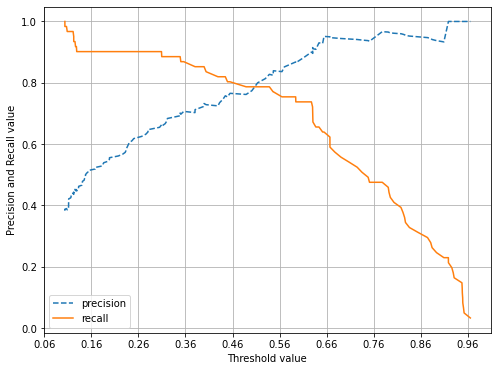

In [25]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class1[0:10])


precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
# precision_recall_curve() API는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 
# 시각화하는데 이용

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
#     print(list(thresholds))
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
#     print(threshold_boundary)
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

#### 결과 해석
* 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낮아짐.(FN이 작아지고 FP가 커짐)
* 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임곗값이 약 0.5 지점에서 재현율과 정밀도가 비슷해지는 모습을 보임.
* 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하는 것은 지양하고 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용

#### 정밀도 및 재현율 활용시 유의 사항
* 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능
* 정밀도 100%가 되는 방법:
  확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측
  전체 환자 1000명중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 P로 예측하고 나머지는 모두 N으로 예측
  FP는 0, TP는 1이 되며 정밀도(TP/(TP+FP)는 1/(1+0) = 1
* 재현율이 100%가 되는 방법: 
  모든 환자를 Positive로 예측
  1000명의 환자중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 0이므로 재현율(TP/(TP+FN)은 30/(30+0) = 1
* 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
* 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 부담과 불평이 커지게 됨

In [26]:
# F1 스코어는 정밀도와 재현율을 결합한 지표
# F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [27]:
# 임계값을 변화시키면서 F1 스코어를 포함한평가 지표 산출
# get_eval_by_threshold() 선실행
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    print()
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

# F1 스코어는 임곗값이  0.6일때 가장 좋은 값을 보여주지만 재현율이 크게 감소하는 점 유의

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, F1:0.7786


임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840


임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805


임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931


임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036




#### ROC 곡선과 AUC
* 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표.
* FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1- 특이성(TNR), TPR은 재현율(민감도)를 나타냄.
* TNR은 TN/(TN+FP)이며 FPR은 FP/(TN+FP)임
* ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR값의 변화에 따른 TPR의 변화 값을 구함.
* FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨. 
* FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정하면 됨.

과제3_1517. 타이타닉 데이터셋으로 모델링한 후 ROC AUC를 포함한 모든 분류 평가지표를 사용하여 평가를 수행하시고 ROC AUC를 시각화 하세요.